In [2]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import d_fuzzy_stream as fuzzy
from datetime import datetime

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/vpozdnyakov/DS_Datasets/master/Synthetic/Non-Stationary/Bench1_11k/Benchmark1_11000.csv')
data.head()

,X1,X2,class
0,0.118788,0.890228,1.0
1,0.107214,0.102574,2.0
2,0.088860,0.899348,1.0
3,0.077085,0.089380,2.0
4,0.113830,0.885728,1.0


In [4]:
res = {'purity': [], 
       'creations': [], 
       'removals': [], 
       'merges': [], 
       'absorptions': [], 
       'seconds': []}
reload(fuzzy)
n = 1000
last = ([False] * (n-1))
last.append(True)

datastream = data.iloc[:n]
datastream = datastream.rename(columns={'class': 'target'})
datastream = datastream.rename(columns={'X1': 'x', 'X2': 'y'})
datastream['last'] = pd.Series(last)
datastream = datastream.fillna(3)

fs = fuzzy.SummaryStructure(threshold=1, max_fc=200)
s = datetime.now()
fs.clustering(datastream, test=True)
f = datetime.now()

res['purity'].append(fs.purity)
res['creations'].append(fs.creations)
res['removals'].append(fs.removals)
res['merges'].append(fs.merges)
res['absorptions'].append(fs.absorptions)
res['seconds'].append((f - s).seconds)
pd.DataFrame(res)

,purity,creations,removals,merges,absorptions,seconds
0,0.348,564,75,290,436,90


In [5]:
reload(fuzzy)
fs.to_dataframe()

,x,y,radius,N,M,SSD,CF
0,0.206982,0.794223,0.001731,48,3.034739,0.000144,"[0.6281372239438603, 2.4102586424322183]"
1,0.223676,0.758662,0.001609,44,3.500131,0.000114,"[0.7828960920103587, 2.655414828375758]"
2,0.225783,0.779730,0.001491,58,4.166792,0.000129,"[0.9407905352433585, 3.248971946672165]"
3,0.230416,0.228287,0.001557,50,5.820957,0.000121,"[1.3412403214059785, 1.3288501792332472]"
4,0.220120,0.229607,0.001550,46,5.076994,0.000110,"[1.1175477799167455, 1.16571421492649]"
...,...,...,...,...,...,...,...
194,0.739671,0.374922,0.001683,40,1.000320,0.000113,"[0.7399072019114362, 0.37504133495093017]"
195,0.233514,0.742096,0.001743,9,1.043537,0.000027,"[0.24368025497041076, 0.7744047934478346]"
196,0.249888,0.262667,0.001320,6,1.002928,0.000010,"[0.25061984325788456, 0.263436299389456]"
197,0.252131,0.256264,0.004429,1,1.000000,0.000000,"(0.252131371709892, 0.256264340594661)"


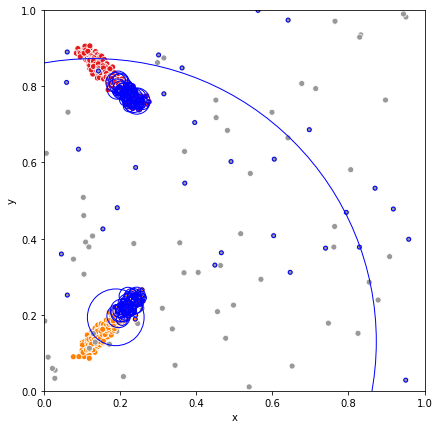

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect(1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
for i_fc in fs.to_dataframe().itertuples():
    fill = True if i_fc.N == 1 else False
    alpha = 0.05 if i_fc.N == 1 else 1    
    circle = plt.Circle((i_fc.x, i_fc.y), 
                        i_fc.M*0.005, 
                        color='b', 
                        fill=fill, 
                        alpha=alpha)
    ax.add_artist(circle)
sns.scatterplot(
    x="x",
    y="y",
    hue="target",
    style='last',
    data=datastream, 
    legend=False, 
    palette="Set1")\
    .get_figure().savefig('sample_plot.pdf')
plt.show()